# Sesion 5

### Velocity Verlet

#### Ecuaciones

$$
\boldsymbol{F}=m\cfrac{d\boldsymbol{v}}{dt}=m\cfrac{d^{2}\boldsymbol{r}}{dt^{2}}
$$

$$x\left(t_{s}+\triangle
t\right)=x\left(t_{s}\right)+v\left(t_{s}\right)\triangle t+\frac{1}{2m}\,
   F\left(t_{s}\right)\triangle t^{2}\,.$$

$$v\left(t_{s}+\triangle
   t\right)=v\left(t_{s}\right)+\frac{1}{2m}\,\left[F\left(t_{s}+\triangle
   t\right)+F\left(t_{s}\right)\right]\triangle t\,.$$

#### Algoritmo

Suponiendo que se conoce la fuerza $F(t_{s})$, la posición $x(t_{s})$ y la velocidad $v(t_{s})$, el algoritmo que se utiliza en el método de Velocity-Verlet, es el siguiente:

1) Calcular la posición $x(t_{s} + \triangle t)$ <br>
2) Evaluar $F(t_{s} + \triangle t)$, que realmente es:  $F(x(t_{s} + \triangle t))$, la fuerza depende de la posición <br>
3) Calcular la velocidad $v(t_{s} + \triangle t)$ <br>
4) Actualizar el tiempo $t_{s} = t_{s} + \triangle t$ <br>
5) Regresar al paso 1


#### Algunas referencias: <br>

* manual dpoly

<img src="../imgs/vverlet1.png">

* manual gromacs

<img src="../imgs/vverlet2.png">

## Ejemplo 1 (oscilador armónico)

$$m\cfrac{d^{2}x}{dt^{2}}=-\cfrac{k}{m}x$$

$$\omega^{2}=\cfrac{k}{m}$$


$$m\cfrac{d^{2}x}{dt^{2}}=-\omega^{2}x$$


#### Soluciones

$$x\left(t\right)=A\cos\left(\omega t+\phi\right)$$

$$v\left(t\right)=-\omega A\sin\left(\omega t+\phi\right)$$

$$x\left(0\right)=A\cos\left(\phi\right)=A$$

$$v\left(0\right)=-wA\sin\left(\phi\right)=0$$

### Haciendo funciones de posicion y velocidad

#### Posicion

$$x\left(t_{s}+\triangle
t\right)=x\left(t_{s}\right)+v\left(t_{s}\right)\triangle t+\frac{1}{2m}\,
   F\left(t_{s}\right)\triangle t^{2}\,.$$

In [3]:
import pandas as pd
import numpy as np

def vv_posicion(x, v, F, m, dt):
    
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    
    return x_next

#### Velocidad

$$v\left(t_{s}+\triangle
   t\right)=v\left(t_{s}\right)+\frac{1}{2m}\,\left[F\left(t_{s}+\triangle
   t\right)+F\left(t_{s}\right)\right]\triangle t\,.$$

In [6]:
import pandas as pd
import numpy as np

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

#### A prueba

In [27]:
import pandas as pd
import numpy as np


def vv_posicion(x, v, F, m, dt):
    
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

def fresorte(x, k, m):
    
    return (-1.0)*np.divide(k, m)*x

t0 = 0.0
x0 = 0.4
v0 = 0.0
m = 1.0
dt = 0.01
k = 1.0

pasos = 1000

sol = {}
sol['x'] = {}
sol['v'] = {}
sol['f'] = {}
sol['t'] = {}

idx = 0

sol['f'][idx] = fresorte(k, m, x0)
sol['x'][idx] = x0
sol['v'][idx] = v0
sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    v = sol['v'][idx]
    fa = sol['f'][idx]
    t = sol['t'][idx]
    
    x = vv_posicion(x, v, fa, m, dt)
    fb = fresorte(x, k, m)
    v = vv_velocidad(v, fa, fb, m, dt)
    
    idx+=1
    t+=dt
    
    sol['x'][idx] = x
    sol['v'][idx] = v
    sol['f'][idx] = fb
    sol['t'][idx] = t
    
    
    
df = pd.DataFrame(sol)

df.head()



,x,v,f,t
0,0.400000,0.000000,-2.500000,0.00
1,0.399875,-0.014499,-0.399875,0.01
2,0.399710,-0.018497,-0.399710,0.02
3,0.399505,-0.022493,-0.399505,0.03
4,0.399260,-0.026487,-0.399260,0.04


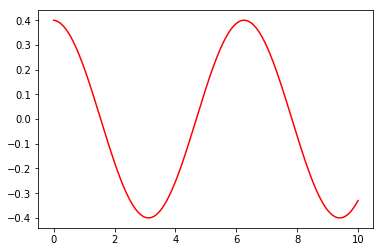

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

x = df['x'].values
t = df['t'].values

plt.plot(t, x, 'r')



#### Viendo con soluciones analíticas

$$x\left(t\right)=A\cos\left(\omega t+\phi\right)$$

$$v\left(t\right)=-\omega A\sin\left(\omega t+\phi\right)$$

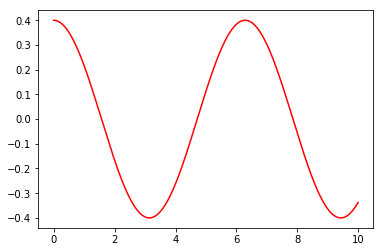

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def a_pos(A, k, m, t):
    
    return A*np.cos(np.sqrt(np.divide(k,m))*t)
    
t0 = 0.0
x0 = 0.4
v0 = 0.0
m = 1.0
dt = 0.01
k = 1.0

pasos = 1000
tf = t0 + pasos*dt 

t = np.arange(t0, tf, dt)
x = a_pos(x0, k, m, t)

plt.plot(t, x, 'r')



### Comparando velocity-verlet vs analíticas

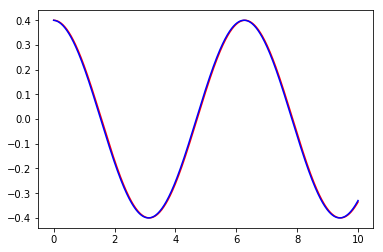

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def vv_posicion(x, v, F, m, dt):
    
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

def fresorte(x, k, m):
    
    return (-1.0)*np.divide(k, m)*x

def a_pos(A, k, m, t):
    
    return A*np.cos(np.sqrt(np.divide(k,m))*t)


t0 = 0.0
x0 = 0.4
v0 = 0.0
m = 1.0
dt = 0.01
k = 1.0

pasos = 1000

sol = {}
sol['x'] = {}
sol['v'] = {}
sol['f'] = {}
sol['t'] = {}

idx = 0

sol['f'][idx] = fresorte(k, m, x0)
sol['x'][idx] = x0
sol['v'][idx] = v0
sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    v = sol['v'][idx]
    fa = sol['f'][idx]
    t = sol['t'][idx]
    
    x = vv_posicion(x, v, fa, m, dt)
    fb = fresorte(x, k, m)
    v = vv_velocidad(v, fa, fb, m, dt)
    
    idx+=1
    t+=dt
    
    sol['x'][idx] = x
    sol['v'][idx] = v
    sol['f'][idx] = fb
    sol['t'][idx] = t
    
    
    
df = pd.DataFrame(sol)


tf = t0 + (pasos + 1)*dt

ta = np.arange(t0, tf, dt)
xa = a_pos(x0, k, m, ta)

tvv = df['t'].values
xvv = df['x'].values

plt.plot(ta, xa, 'r')
plt.plot(tvv, xvv, 'b')

plt.show()




In [11]:
import numpy as np

def desviacion_estandard(xreal, xcal):
    return np.sqrt(np.mean(np.abs(xcal - xreal)**2))

In [37]:
desviacion_estandard(xa, xvv)

0.007256275799853866

## Viendo desviaciones 

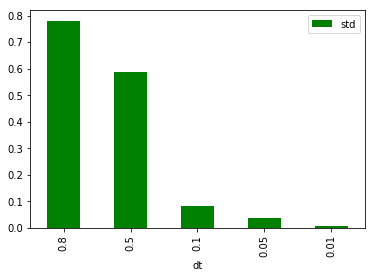

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


def vv_posicion(x, v, F, m, dt):
    
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    
    return v_next

def fresorte(x, k, m):
    
    return (-1.0)*np.divide(k, m)*x

def a_pos(A, k, m, t):
    
    return A*np.cos(np.sqrt(np.divide(k,m))*t)

def desviacion_estandard(xreal, xcal):
    return np.sqrt(np.mean(np.abs(xcal - xreal)**2))

dic = {}
dic['std'] = {}
dic['dt'] = {}

idx2 = 0

dts = [0.8, 0.5, 0.1, 0.05, 0.01]
for dt in dts:
    t0 = 0.0
    x0 = 0.4
    v0 = 0.0
    m = 1.0
#     dt = 0.01
    k = 1.0

    pasos = 1000

    sol = {}
    sol['x'] = {}
    sol['v'] = {}
    sol['f'] = {}
    sol['t'] = {}

    idx = 0

    sol['f'][idx] = fresorte(k, m, x0)
    sol['x'][idx] = x0
    sol['v'][idx] = v0
    sol['t'][idx] = t0

    for i in range(pasos):

        x = sol['x'][idx]
        v = sol['v'][idx]
        fa = sol['f'][idx]
        t = sol['t'][idx]

        x = vv_posicion(x, v, fa, m, dt)
        fb = fresorte(x, k, m)
        v = vv_velocidad(v, fa, fb, m, dt)

        idx+=1
        t+=dt

        sol['x'][idx] = x
        sol['v'][idx] = v
        sol['f'][idx] = fb
        sol['t'][idx] = t

    df = pd.DataFrame(sol)

    tf = t0 + (pasos + 1)*dt

    ta = np.arange(t0, tf, dt)
    xa = a_pos(x0, k, m, ta)

    tvv = df['t'].values
    xvv = df['x'].values
    
    std = desviacion_estandard(xa, xvv)
    
    dic['std'][idx2] = std
    dic['dt'][idx2] = dt
    
    idx2+=1
    
df2 = pd.DataFrame(dic)
dts = df2['dt'].values
stds = df2['std'].values

ax = df2.plot(kind='bar', color='g', x='dt', y='std')

plt.show()

    
    

# Fuerza de coulomb

$$F=\cfrac{1}{4\pi\epsilon_{0}}\,\cfrac{q_{a}q_{b}}{r^{2}}$$


In [ ]:
# <img src="../imgs/atomic-units.png">

In [ ]:
# <img src="../imgs/hartree.png">

In [ ]:
# <img src="../imgs/hartree2.png">

### MD units (gromacs)

<img src="../imgs/gromacs-md-units-1.png">

<img src="../imgs/gromacs-md-units-2.png">

### Unidades fuerza 

$$F=f\,\cfrac{q^{2}}{r^{2}}$$


$$f=\cfrac{1}{4\pi\epsilon_{0}}=138.935\,458\cfrac{\mbox{kJ}\,\mbox{nm}}{\mbox{mol}\,\mbox{e}^{2}}$$


$$F\sim\cfrac{\mbox{kJ}\,\mbox{nm}}{\mbox{mol}\,\mbox{e}^{2}}\,\cfrac{\mbox{e}^{2}}{\mbox{nm}^{2}}=\cfrac{\mbox{kJ}}{\mbox{mol}\,}\,\cfrac{1}{\mbox{nm}}$$


$$\left[\cfrac{\left(138.93\times10^{3}\right)\mbox{kg}\,\mbox{m}^{2}\,\mbox{s}^{-2}}{\left(6.022\times10^{23}\right)\left(10^{-9}\right)\mbox{m}}\right]\,\left[\cfrac{\left(10^{-24}\right)\mbox{s}^{2}}{\left(1.66\times10^{-27}\right)\mbox{kg}}\right]\sim\mbox{m}$$



In [16]:
(3 -24) - (23 -9 -27) #10s

-8

In [18]:
(138.93/6.022)*(1/1.66) 

13.897836447083588

In [12]:
##referencia: pagina 300 manual gromacs 2020, 42p szabo

### Prueba cargas

In [14]:
def coulomb(e1, e2, r2):
    f = 138.935
    
    return f*np.divide(e1*e2, r2*r2)

e1 = 1.0
e2 = -1.0

r2 = .4

coulomb(e1, e2, r2)



-868.3437499999999

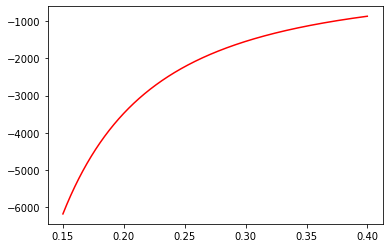

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(e1, e2, r2):
    f = 138.935
    
    return f*np.divide(e1*e2, r2*r2)


e1 = 1.0
e2 = -1.0

r2 = .4


rs = np.arange(0.15, 0.4, 0.0001)

cs = coulomb(e1, e2, rs)

plt.plot(rs, cs, 'r')

plt.show()



### Evolucion con velocity verlet

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(e1, e2, r):
    f = 138.935
    
    return f*np.divide(e1*e2, np.power(r, 2))

m1 = 22.989769 #sodio
m2 = 35.453    #cloro

e1 = 1.0
e2 = -1.0

dt = 0.001
pasos = 1000
    

sol = {}
sol['x'] = {}
sol['y'] = {}
sol['z'] = {}

sol['vx'] = {}
sol['vy'] = {}
sol['vz'] = {}

sol['fx'] = {}
sol['fy'] = {}
sol['fz'] = {}

sol['t'] = {}

idx = 0

sol['x'][idx] = x0
sol['y'][idx] = y0
sol['z'][idx] = z0

sol['vx'][idx] = {}
sol['vy'][idx] = {}
sol['vz'][idx] = {}

sol['fx'] = {}
sol['fy'] = {}
sol['fz'] = {}

sol['x'][idx] = x0
sol['v'][idx] = v0
sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    v = sol['v'][idx]
    fa = sol['f'][idx]
    t = sol['t'][idx]
    
    x = vv_posicion(x, v, fa, m, dt)
    fb = coulomb(e1, e2, x)
    v = vv_velocidad(v, fa, fb, m, dt)
    
    idx+=1
    t+=dt
    
    sol['x'][idx] = x
    sol['v'][idx] = v
    sol['f'][idx] = fb
    sol['t'][idx] = t
    
    
    
df = pd.DataFrame(sol)

df.head()
    
    
    
    





## Consideraciones sobre la fuerza de coulombm

In [2]:
import numpy as np

def coulomb(qi, qj, ri, rj):
    f = 138.935
    rij = np.subtract(rj, ri)
    rij3 = np.power(np.linalg.norm(rij), 3)
    return f*np.divide(q1*q2, rij3)*rij

# Retomando vv coulomb

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

def coulomb(qi, qj, ri, rj):
    f = 138.935
    rij = np.subtract(rj, ri)
    rij3 = np.power(np.linalg.norm(rij), 3)
    return f*np.divide(qi*qj, rij3)*rij

def vv_posicion(x, v, F, m, dt):
    x_next = x + v*dt + np.divide(F, 2*m)*np.power(dt, 2)
    return x_next

def vv_velocidad(v, F_anterior, F_actual, m, dt):
    v_next = v + np.divide(F_anterior + F_actual, 2*m)*dt
    return v_next


mi = 22.989    # sodio
mj = 35.453    # cloro

qi = 1.0       # sodio
qj = -1.0      # cloro

dt = 0.001
pasos = 1000

sol = {}
coords = ['x', 'y', 'z']
vels = ['vx', 'vy', 'vz']
fs = ['fx', 'fy', 'fz']

keys = coords
keys.extend(vels)
keys.extend(fs)
keys.append('t')

for key in keys:
    sol[key] = {}

idx = 0
x0, y0, z0 = -1, 0, 0
vx0, vy0, vz0 = 0.001, 0, 0 
fx0, fy0, fz0 = 0, 0, 0
t0 = 0.0

sol['x'][idx] = x0
sol['y'][idx] = y0
sol['z'][idx] = z0

sol['vx'][idx] = vx0
sol['vy'][idx] = vy0
sol['vz'][idx] = vz0

sol['fx'][idx] = fx0
sol['fy'][idx] = fy0
sol['fz'][idx] = fz0

sol['t'][idx] = t0

for i in range(pasos):
    
    x = sol['x'][idx]
    y = sol['y'][idx]
    z = sol['z'][idx] 

    vx = sol['vx'][idx]
    vy = sol['vy'][idx] 
    vz = sol['vz'][idx] 

    fxa = sol['fx'][idx]
    fya = sol['fy'][idx]
    fza = sol['fz'][idx]
    
    t = sol['t'][idx]

    x = vv_posicion(x, vx, fxa, mi, dt)
    y = vv_posicion(y, vy, fya, mi, dt)
    z = vv_posicion(z, vz, fza, mi, dt)
    
    ri = [x, y, z]
    fc = (-1)*coulomb(qi, qj, ri, [0.0, 0.0, 0.0])
    
    fxb = fc[0]
    fyb = fc[1]
    fzb = fc[2]

    vx = vv_velocidad(vx, fxa, fxb, mi, dt)    
    vy = vv_velocidad(vy, fya, fyb, mi, dt)    
    vz = vv_velocidad(vz, fza, fzb, mi, dt)
    
    idx+=1
    t = t + dt
    
    sol['x'][idx] = x
    sol['y'][idx] = y
    sol['z'][idx] = z

    sol['vx'][idx] = vx
    sol['vy'][idx] = vy
    sol['vz'][idx] = vz

    sol['fx'][idx] = fxb
    sol['fy'][idx] = fyb
    sol['fz'][idx] = fzb
    
    sol['t'][idx] = t
    
    
    
df = pd.DataFrame(sol)
df.head()
    
    
    
    





,x,y,z,vx,vy,vz,fx,fy,fz,t
0,-1.000000,0.0,0.0,0.001000,0.0,0.0,0.000000,0.0,0.0,0.000
1,-0.999999,0.0,0.0,0.004022,0.0,0.0,138.935278,0.0,0.0,0.001
2,-0.999992,0.0,0.0,0.010065,0.0,0.0,138.937235,0.0,0.0,0.002
3,-0.999979,0.0,0.0,0.016109,0.0,0.0,138.940872,0.0,0.0,0.003
4,-0.999960,0.0,0.0,0.022153,0.0,0.0,138.946188,0.0,0.0,0.004


# pasandolo a un movie

In [5]:
len(df)

1001

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

f = open('movie', 'r')
for idx in df.index:
    f.write(str(len(df))+"\n")
    f.write("frame: {}\n".format(idx))
    
    x = df['x'][idx]
    y = df['y'][idx]
    z = df['z'][idx]
    
    f.write("{}{}{}{}".format("Na", x, y, z))
